# Estimating photometric redshifts with a Neural Network

If you need to install the packages you just need to type in the terminal either one of the following commands (according to how you installed your version of python) followed by the name of the packages. 

$\texttt{sudo pip install}$

$\texttt{sudo conda install}$

In [1]:
# usual packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# machine learning packages
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Plotting section (no machine learning involved)

This part is needed to understand the data you are working with and you are encourage to do your own plots using the names of the columns below. However, you can skip this part if you want to go straight to the NEURAL NETWORK part.

## Read data

In [4]:
#COSMOS = pd.read_csv('match_COSMOS_999.txt')
COSMOS = pd.read_csv('match_COSMOS_99_with_err.csv')

## Columns names

In [5]:
COSMOS.columns.values

array(['ALPHA_J2000', 'B_MAGERR_APER2', 'B_MAG_APER2', 'DELTA_J2000',
       'H_MAGERR_APER2', 'H_MAG_APER2', 'Hw_MAGERR_APER2', 'Hw_MAG_APER2',
       'IA484_MAGERR_APER2', 'IA484_MAG_APER2', 'IA527_MAGERR_APER2',
       'IA527_MAG_APER2', 'IA624_MAGERR_APER2', 'IA624_MAG_APER2',
       'IA679_MAGERR_APER2', 'IA679_MAG_APER2', 'IA738_MAGERR_APER2',
       'IA738_MAG_APER2', 'IA767_MAGERR_APER2', 'IA767_MAG_APER2',
       'IB427_MAGERR_APER2', 'IB427_MAG_APER2', 'IB464_MAGERR_APER2',
       'IB464_MAG_APER2', 'IB505_MAGERR_APER2', 'IB505_MAG_APER2',
       'IB574_MAGERR_APER2', 'IB574_MAG_APER2', 'IB709_MAGERR_APER2',
       'IB709_MAG_APER2', 'IB827_MAGERR_APER2', 'IB827_MAG_APER2',
       'J_MAGERR_APER2', 'J_MAG_APER2', 'Ks_MAGERR_APER2', 'Ks_MAG_APER2',
       'Ksw_MAGERR_APER2', 'Ksw_MAG_APER2', 'NB711_MAGERR_APER2',
       'NB711_MAG_APER2', 'NB816_MAGERR_APER2', 'NB816_MAG_APER2',
       'NBFILT', 'NUMBER', 'SPLASH_1_MAG', 'SPLASH_1_MAGERR',
       'SPLASH_2_MAG', 'SPLASH_2_MAGE

# Example plot

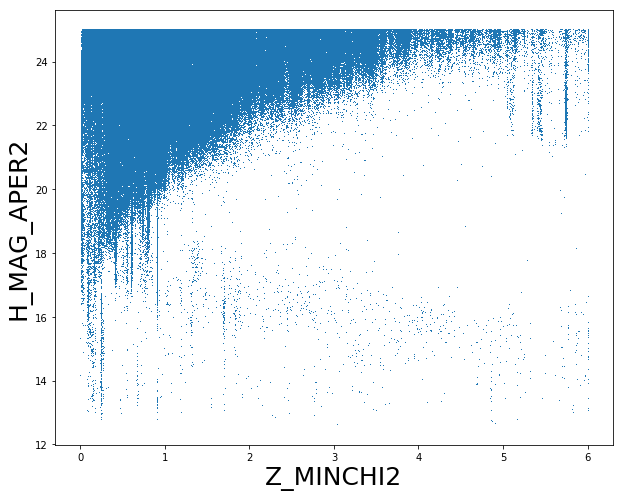

In [6]:
x = 'Z_MINCHI2'
y = 'H_MAG_APER2'
################################
plt.figure(figsize=(10,8))
plt.plot(COSMOS[x],COSMOS[y],',')
plt.xlabel(x,fontsize=25)
plt.ylabel(y,fontsize=25)
plt.show()

## Handy functions to plot data

In [7]:
def PLOT_2d(x,y,df=COSMOS):
    '''Return the figure object with the plot of x and y. 
    Where x and y are the keywords from the pandas dataframe df. 
    You can add features outside the function 
    to the current instance of the figure, e.g. plt.xlim() or plt.title()'''
    fig = plt.figure(figsize=(10,8))
    plt.plot(df[x],df[y],',')
    plt.xlabel(x,fontsize=25)
    plt.ylabel(y,fontsize=25)
    return fig 

In [8]:
def HISTO(x,bn=30,df=COSMOS):
    '''Return the figure object with the histogram of x 
    where x is the keywords from the pandas dataframe df. 
    You can add features outside the function 
    to the current instance of the figure, e.g. plt.xlim() or plt.title()'''
    fig = plt.figure(figsize=(10,8))
    plt.hist(df[x],bins=bn,histtype='step',lw=3)
    plt.xlabel(x,fontsize=25)
    plt.ylabel('counts',fontsize=25)
    return fig 

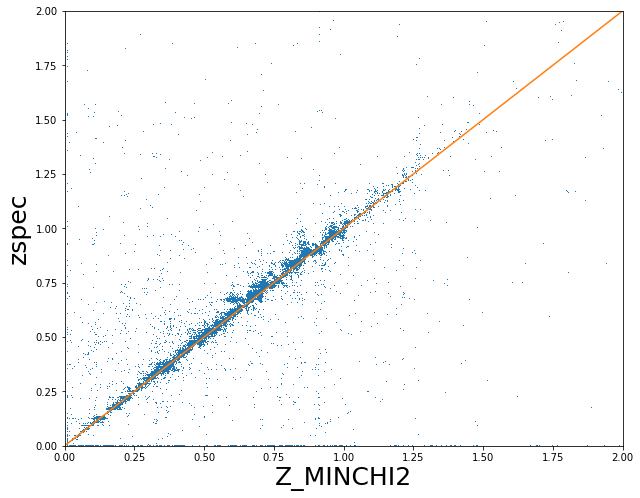

In [9]:
PLOT_2d(x='Z_MINCHI2',y='zspec')
plt.xlim(0,2.)
plt.ylim(0,2.)
plt.plot([0,10],[0,10])
plt.show()

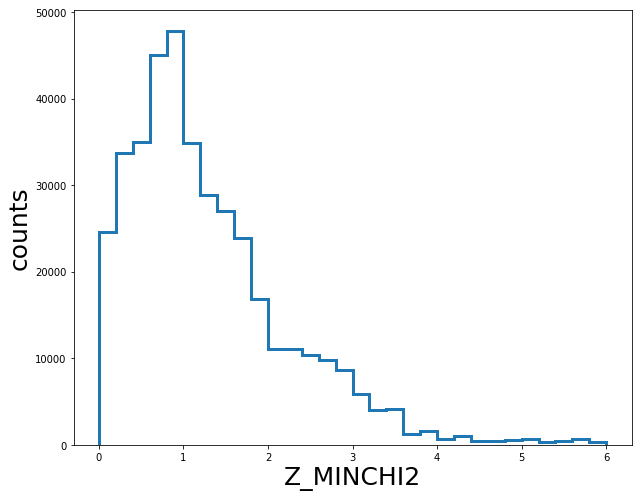

In [10]:
HISTO('Z_MINCHI2')
plt.show()

# NEURAL NETWORK

## Define input and output

In [11]:
# input for the neural network 
# just picking useful columns
# i.e. all the photometric bands excluding errors
photo_bands_all = np.loadtxt('match_COSMOS_99_with_err.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[2,7,9,11,13,15,17,19,21,23,25,27,29,31,37,39,41,44,46,48,50,53,58,60,62,64])

In [12]:
# spectroscopic redshifts
# this is the output we want to train our NN on
# were z_spec_all < 0, it means there is no measurenment
z_spec_all = np.loadtxt('match_COSMOS_99_with_err.csv',
                    delimiter=',',
                    comments='#',
                    skiprows=1,
                    usecols=[65])

In [13]:
# Let's select just objects for which we have a spectroscopic measurement
good_z = np.where(z_spec_all>0.)
photo_bands = photo_bands_all[good_z]
z_spec = z_spec_all[good_z]

# Let's split the sample in training and test

In [14]:
# The sklearn function train_test_split is just needed 
# to split the data in two part that we will 
# use as training and test sample.
photo_bands_train,photo_bands_test, z_spec_train, z_spec_test = train_test_split(photo_bands, z_spec, test_size=0.2)

In [15]:
# test_size controls how the sample is splitted
print "training sample size: ",len(photo_bands_train)
print "test sample size: ",len(photo_bands_test)
print "train + test = ", len(photo_bands_train)+len(photo_bands_test)
print "train / sample =", round(float(len(photo_bands_train))/float(len(photo_bands)),1)
print "test / sample =", round(float(len(photo_bands_test))/float(len(photo_bands)),1)

training sample size:  13824
test sample size:  3457
train + test =  17281
train / sample = 0.8
test / sample = 0.2


## Create the NN model

In [16]:
model = Sequential()
#create a network with 3 layers (we don't count the input one)
# in the input layer we choose a number of neurons (30) greater than the number of variables (26)
model.add(Dense(30,input_dim=26,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
# it's important to choose a linear activation function for the output layer
# as we are trying to predict real numbers and we are not classifying objects
model.add(Dense(1,activation='linear'))

In [17]:
#compiling the model before running it
model.compile(loss='mean_absolute_error', optimizer='adam')

## Training the network

In [18]:
# epochs controls the number of iteration where the 
# algorithm optimizes the weights that it assigns to each variable
# The loss function evaluate how good 
# is the redshift prediction using 
# the weights of the current iteration (should decrease through the epochs).
# batch_size is the number of rows that 
# the algorithms take into account before updating the weights.
model.fit(photo_bands_train,z_spec_train,epochs=40,batch_size=20)

Epoch 1/40
13824/13824 [==============================] - 2s 163us/step - loss: 0.2985
Epoch 2/40
13824/13824 [==============================] - 1s 105us/step - loss: 0.2159
Epoch 3/40
13824/13824 [==============================] - 1s 108us/step - loss: 0.1944
Epoch 4/40
13824/13824 [==============================] - 1s 105us/step - loss: 0.1956
Epoch 5/40
13824/13824 [==============================] - 1s 105us/step - loss: 0.1831
Epoch 6/40
13824/13824 [==============================] - 1s 106us/step - loss: 0.1790
Epoch 7/40
13824/13824 [==============================] - 1s 106us/step - loss: 0.1718
Epoch 8/40
13824/13824 [==============================] - 1s 106us/step - loss: 0.1685
Epoch 9/40
13824/13824 [==============================] - 1s 106us/step - loss: 0.1647
Epoch 10/40
13824/13824 [==============================] - 1s 105us/step - loss: 0.1639
Epoch 11/40
13824/13824 [==============================] - 1s 105us/step - loss: 0.1612
Epoch 12/40
13824/13824 [================

In [19]:
# prediction on the test sample
z_predict = model.predict(photo_bands_test)

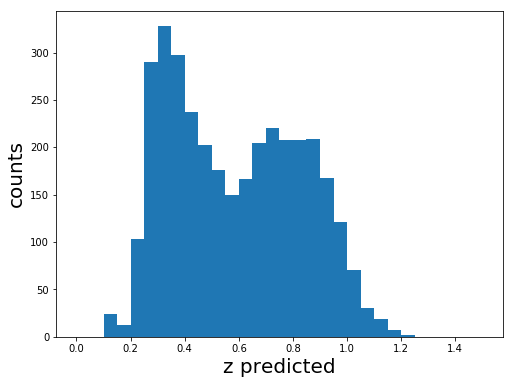

In [20]:
# distribution of redshifts predicted from the training sample
plt.figure(figsize=(8,6))
plt.hist(z_predict,bins=30,range=(0.,1.5))
plt.xlabel('z predicted',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.show()

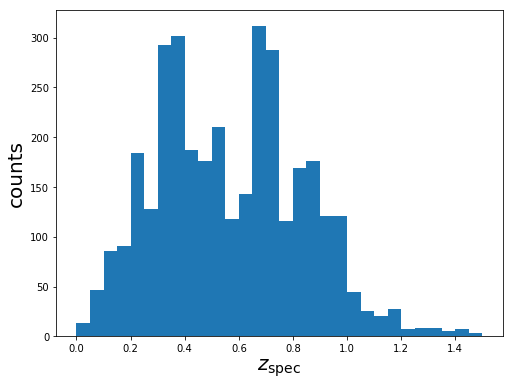

In [21]:
# distribution of real spectroscopic redshifts 
# on the test sample
plt.figure(figsize=(8,6))
plt.hist(z_spec_test,bins=30,range=(0.,1.5))
plt.xlabel(r'$z_{\rm{spec}}$',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.show()

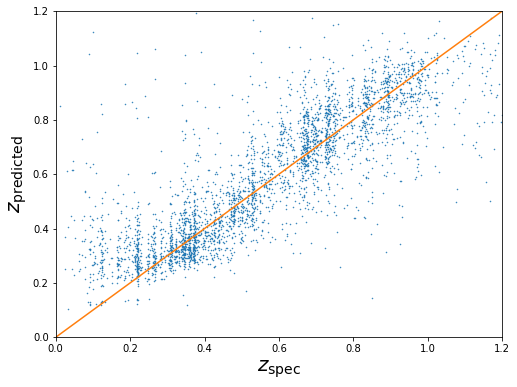

In [22]:
plt.figure(figsize=(8,6))
plt.plot(z_spec_test,z_predict,".",markersize=1)
plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,1.2)
plt.ylim(0.,1.2)
plt.xlabel(r'$z_{\rm{spec}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.show()

## Predict the entire sample and compare it with an estimate of the photometric redshift

In [23]:
z_predict_all = model.predict(photo_bands_all)

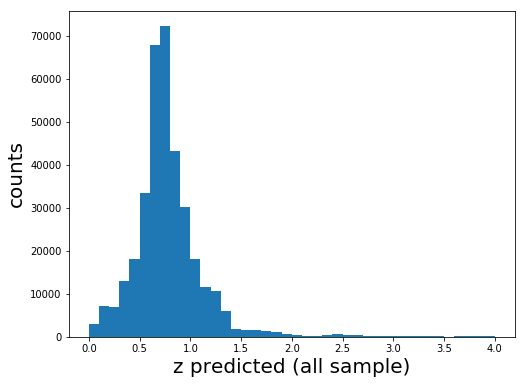

In [24]:
# distribution of redshifts predicted for the entire sample
plt.figure(figsize=(8,6))
plt.hist(z_predict_all,bins=40,range=(0.,4))
plt.xlabel('z predicted (all sample)',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.show()

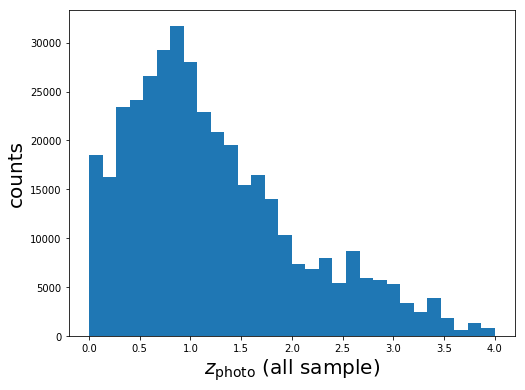

In [25]:
# to test the entire sample we can't use z_spec simply because we don't have measurements
# but we have an estimate of the photometric redshift from the COSMOS sample.
plt.figure(figsize=(8,6))
plt.hist(COSMOS['Z_MINCHI2'],bins=30,range=(0.,4))
plt.xlabel(r'$z_{\rm{photo}}$ (all sample)',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.show()

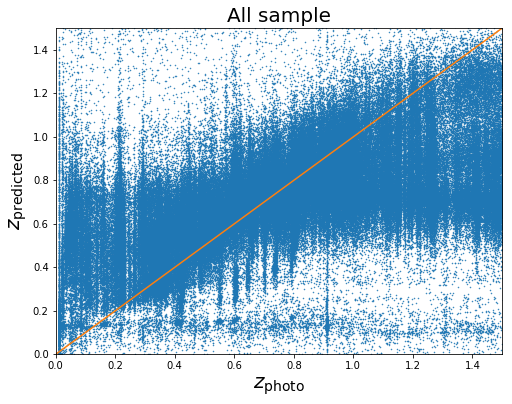

In [26]:
plt.figure(figsize=(8,6))
plt.plot(COSMOS['Z_MINCHI2'],z_predict_all,".",markersize=1)
plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,1.5)
plt.ylim(0.,1.5)
plt.xlabel(r'$z_{\rm{photo}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.title('All sample',fontsize=20)
plt.show()